# Logistic Regression with TF

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

2.2.0


## Data

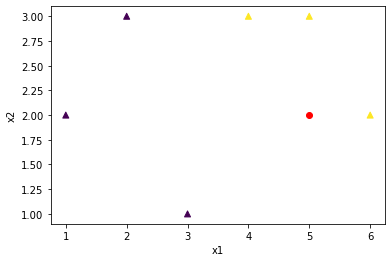

In [2]:
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [11]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))#.repeat()

In [4]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [5]:
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

In [7]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [8]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

In [9]:
## Calculate Gradient

def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [12]:
## Start learning

EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000


## Full Example - Diabetes Data

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

2.2.0


In [16]:
xy = np.loadtxt('../input/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

print(x_train.shape, y_train.shape)
print(xy)

(759, 8) (759, 1)
[[-0.294118   0.487437   0.180328  ... -0.53117   -0.0333333  0.       ]
 [-0.882353  -0.145729   0.0819672 ... -0.766866  -0.666667   1.       ]
 [-0.0588235  0.839196   0.0491803 ... -0.492741  -0.633333   0.       ]
 ...
 [-0.411765   0.21608    0.180328  ... -0.857387  -0.7        1.       ]
 [-0.882353   0.266332  -0.0163934 ... -0.768574  -0.133333   0.       ]
 [-0.882353  -0.0653266  0.147541  ... -0.797609  -0.933333   1.       ]]


In [17]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

In [18]:
W = tf.Variable(tf.random.normal((8, 1)), name='weight')
b = tf.Variable(tf.random.normal((1,)), name='bias')

In [19]:
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

In [20]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [21]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

In [22]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [23]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))

Iter: 0, Loss: 0.6556
Iter: 100, Loss: 0.6188
Iter: 200, Loss: 0.5980
Iter: 300, Loss: 0.5854
Iter: 400, Loss: 0.5769
Iter: 500, Loss: 0.5704
Iter: 600, Loss: 0.5648
Iter: 700, Loss: 0.5599
Iter: 800, Loss: 0.5555
Iter: 900, Loss: 0.5513
Iter: 1000, Loss: 0.5475


## Logistic Regression with tf.keras

In [ ]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=2))

# use sigmoid activation for 0~1 problem
tf.model.add(tf.keras.layers.Activation('sigmoid'))

''' 
better result with loss function == 'binary_crossentropy', try 'mse' for yourself
adding accuracy metric to get accuracy report during training
'''
tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=5000)

# Accuracy report
print("Accuracy: ", history.history['accuracy'][-1])

## Logistic Regression Example with tf.keras - Diabetes Dataset

In [25]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf
import numpy as np

xy = np.loadtxt('../input/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

tf.model = tf.keras.Sequential()
# multi-variable, x_data.shape[1] == feature counts == 8 in this case
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=x_data.shape[1], activation='sigmoid'))
tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.01),  metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=500)

# accuracy!
print("Accuracy: {0}".format(history.history['accuracy'][-1]))

# predict a single data point
y_predict = tf.model.predict([[0.176471, 0.155779, 0, 0, 0, 0.052161, -0.952178, -0.733333]])
print("Predict: {0}".format(y_predict))

# evaluating model
evaluate = tf.model.evaluate(x_data, y_data)
print("loss: {0}, accuracy: {1}".format(evaluate[0], evaluate[1]))

(759, 8) (759, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
24/24 [==============================] - 0s 1ms/step - loss: 0.7309 - accuracy: 0.4269
Epoch 2/500
24/24 [==============================] - 0s 1ms/step - loss: 0.7110 - accuracy: 0.4730
Epoch 3/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5415
Epoch 4/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.5679
Epoch 5/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.6087
Epoch 6/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.6285
Epoch 7/500
24/24 [=========================

24/24 [==============================] - 0s 1ms/step - loss: 0.5480 - accuracy: 0.7101
Epoch 79/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5472 - accuracy: 0.7128
Epoch 80/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.7128
Epoch 81/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5458 - accuracy: 0.7141
Epoch 82/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5452 - accuracy: 0.7154
Epoch 83/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5445 - accuracy: 0.7167
Epoch 84/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5438 - accuracy: 0.7194
Epoch 85/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.7207
Epoch 86/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.7233
Epoch 87/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5419 - accuracy: 0.7220
Epoch 88/500


24/24 [==============================] - 0s 1ms/step - loss: 0.5110 - accuracy: 0.7589
Epoch 160/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7576
Epoch 161/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5105 - accuracy: 0.7576
Epoch 162/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5102 - accuracy: 0.7563
Epoch 163/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5099 - accuracy: 0.7576
Epoch 164/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7602
Epoch 165/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7589
Epoch 166/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5091 - accuracy: 0.7589
Epoch 167/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.7589
Epoch 168/500
24/24 [==============================] - 0s 1ms/step - loss: 0.5086 - accuracy: 0.7602
Epoc

24/24 [==============================] - 0s 1ms/step - loss: 0.4952 - accuracy: 0.7694
Epoch 241/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.7708
Epoch 242/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4949 - accuracy: 0.7708
Epoch 243/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.7694
Epoch 244/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7708
Epoch 245/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4945 - accuracy: 0.7708
Epoch 246/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.7708
Epoch 247/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4943 - accuracy: 0.7708
Epoch 248/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.7708
Epoch 249/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4940 - accuracy: 0.7708
Epoc

24/24 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.7655
Epoch 321/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7655
Epoch 322/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.7655
Epoch 323/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.7655
Epoch 324/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7668
Epoch 325/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4867 - accuracy: 0.7655
Epoch 326/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4867 - accuracy: 0.7655
Epoch 327/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.7655
Epoch 328/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7655
Epoch 329/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.7668
Epoc

24/24 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7628
Epoch 401/500
24/24 [==============================] - ETA: 0s - loss: 0.5295 - accuracy: 0.71 - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7628
Epoch 402/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7628
Epoch 403/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7628
Epoch 404/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7628
Epoch 405/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7628
Epoch 406/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7628
Epoch 407/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7628
Epoch 408/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7628
Epoch 409/500
24/24 [==============================] - 0s 1ms/s

Epoch 478/500
24/24 [==============================] - ETA: 0s - loss: 0.5429 - accuracy: 0.68 - 0s 1ms/step - loss: 0.4796 - accuracy: 0.7681
Epoch 479/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.7694
Epoch 480/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7681
Epoch 481/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7681
Epoch 482/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7694
Epoch 483/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7694
Epoch 484/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7694
Epoch 485/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7694
Epoch 486/500
24/24 [==============================] - 0s 1ms/step - loss: 0.4793 - accuracy: 0.7694
Epoch 487/500
24/24 [============================